# Tensorflow digit recongition demo
## MNIST hand written data set

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import random as ran
learn = tf.contrib.learn
tf.logging.set_verbosity(tf.logging.ERROR)

## Import the dataset

In [23]:
mnist = learn.datasets.load_dataset('mnist')
data = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
test_data = mnist.test.images
test_labels = np.asarray(mnist.test.labels, dtype=np.int32)

Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz


In [24]:
max_examples = 10000
data = data[:max_examples]
labels = labels[:max_examples]

In [25]:
print (mnist.train.images.shape)
print (mnist.train.labels.shape)

(55000, 784)
(55000,)


## Display some digits

In [26]:
def display(i):
    img = test_data[i]
    plt.title('Example %d. Label: %d' % (i, test_labels[i]))
    plt.imshow(img.reshape((28,28)), cmap=plt.cm.gray_r)    

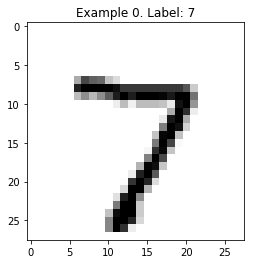

In [27]:
display(0)

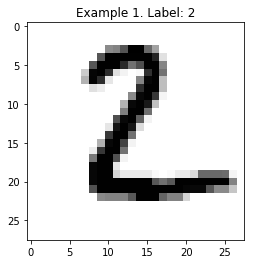

In [28]:
display(1)

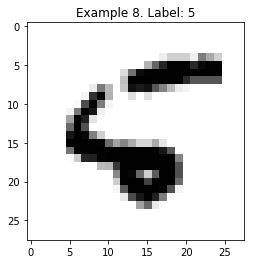

In [29]:
display(8)

In [30]:
print (len(data[0]))

784


## Fittinga Linear Classifier


In [31]:
feature_columns = learn.infer_real_valued_columns_from_input(data)
classifier = learn.LinearClassifier(feature_columns = feature_columns, n_classes = 10)
classifier.fit(data, labels, batch_size=100, steps=1000)

LinearClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._MultiClassHead object at 0x7f3a945ed2e8>, 'feature_columns': [_RealValuedColumn(column_name='', dimension=784, default_value=None, dtype=tf.float32, normalizer=None)], 'optimizer': None, 'gradient_clip_norm': None, 'joint_weights': False})

## Evaluate accuracy

In [32]:
classifier.evaluate(test_data, test_labels)
print (classifier.evaluate(test_data, test_labels)["accuracy"])

0.9137


## Classify a few examples

We can make predictions on individual images using the predict method

Predicted 7, Label: 7


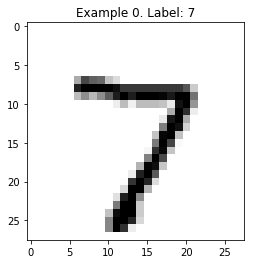

In [33]:
print ("Predicted %d, Label: %d" % (classifier.predict(np.array([test_data[0]], dtype=float), as_iterable=False), test_labels[0]))
display(0)

Predicted 6, Label: 5


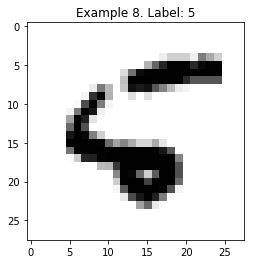

In [34]:
print ("Predicted %d, Label: %d" % (classifier.predict(np.array([test_data[8]], dtype=float), as_iterable=False), test_labels[8]))
display(8)

Predicted 8, Label: 2


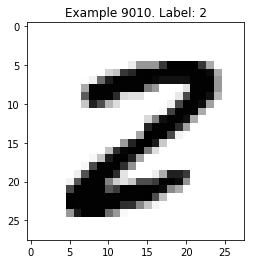

In [35]:
print ("Predicted %d, Label: %d" % (classifier.predict(np.array([test_data[9010]], dtype=float), as_iterable=False), test_labels[9010]))
display(9010)

## WIP :(


In [36]:
weights = classifier.weights_
f, axes = plt.subplots(2, 5, figsize=(10,4))
axes = axes.reshape(-1)
for i in range(len(axes)):
    a = axes[i]
    a.imshow(weights.T[i].reshape(28, 28), cmap=plt.cm.seismic)
    a.set_title(i)
    a.set_xticks(())
    a.set_yticks(())
plt.show()

AttributeError: 'LinearClassifier' object has no attribute 'weights_'

In [47]:
sess=tf.Session()
def display_compare(num):
    # THIS WILL LOAD ONE TRAINING EXAMPLE
    x_train = mnist.train.images[num,:].reshape(1,784)
    y_train = mnist.train.labels[num:]
    # THIS GETS OUR LABEL AS A INTEGER
    label = y_train.argmax()
    # THIS GETS OUR PREDICTION AS A INTEGER
    prediction = sess.run(y, feed_dict={x: x_train}).argmax()
    plt.title('Prediction: %d Label: %d' % (prediction, label))
    plt.imshow(x_train.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
    plt.show()

In [48]:
display_compare(ran.randint(0, 55000))

IndexError: too many indices for array